<a href="https://colab.research.google.com/github/aryanfarswan77/prasunet/blob/main/Linear_Regression_Model_to_Predict_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2 : Linear Regression Model to Predict House Prices.

Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.

Inputs:
* Lot size of the house [in Square Feet].
* Number of Bedrooms in the house.
* Number of Bathrooms in the house.
  * Full Bathrooms
  * Half Bathrooms

Output:
* Predicted Price of the house [in Dollars].

## Data Collection
Source: [Dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)


###Importing the Dataset

In [ ]:
import pandas as pd
housing= pd.read_csv("/content/drive/MyDrive/House Price Prediction/train.csv")

##Data Preprocessing

###Understanding DataSet

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

###Data Cleaning

In [ ]:
#Dropping Irrelavant Columns
housing= housing[["LotArea","BedroomAbvGr","FullBath","HalfBath","SalePrice"]]
housing.head()

,LotArea,BedroomAbvGr,FullBath,HalfBath,SalePrice
0,8450,3,2,1,208500
1,9600,3,2,0,181500
2,11250,3,2,1,223500
3,9550,3,1,0,140000
4,14260,4,2,1,250000


### Insights from Data

In [ ]:
housing.describe()

,LotArea,BedroomAbvGr,FullBath,HalfBath,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,2.866438,1.565068,0.382877,180921.195890
std,9981.264932,0.815778,0.550916,0.502885,79442.502883
min,1300.000000,0.000000,0.000000,0.000000,34900.000000
25%,7553.500000,2.000000,1.000000,0.000000,129975.000000
50%,9478.500000,3.000000,2.000000,0.000000,163000.000000
75%,11601.500000,3.000000,2.000000,1.000000,214000.000000
max,215245.000000,8.000000,3.000000,2.000000,755000.000000


###Visualizing Data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

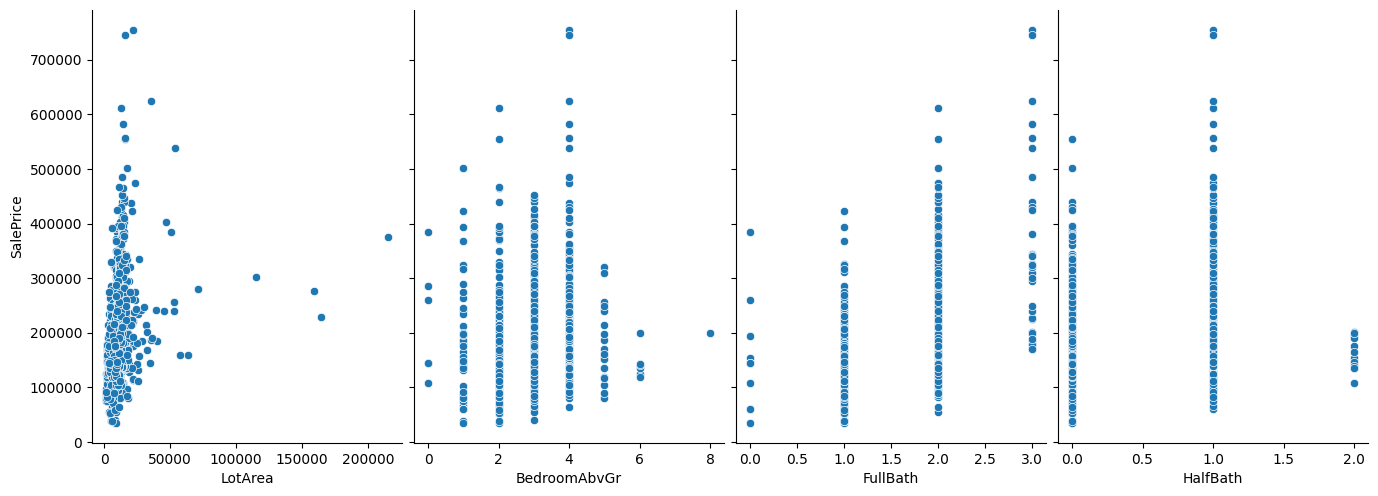

In [ ]:
# Plot scatter plots for each numerical feature against the target variable (Sales)
sns.pairplot(housing, x_vars=["LotArea","BedroomAbvGr","FullBath","HalfBath"], y_vars="SalePrice", height=5, aspect=0.7, kind='scatter')
plt.show()

###Checking For Null Values

In [ ]:
print(housing.isnull().sum())

LotArea         0
BedroomAbvGr    0
FullBath        0
HalfBath        0
SalePrice       0
dtype: int64


###Outliers Handling

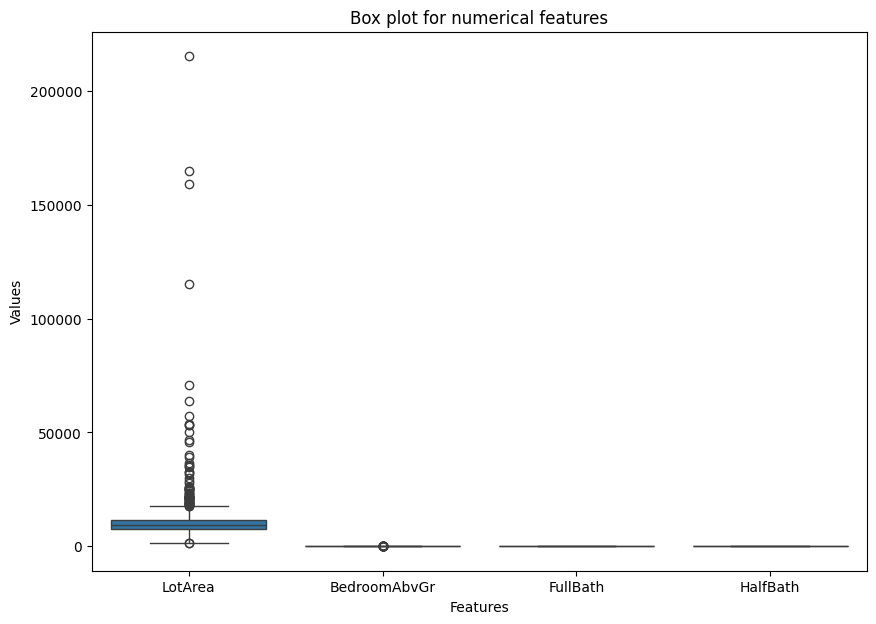

In [ ]:
# Plot box plots to identify outliers
plt.figure(figsize=(10, 7))
sns.boxplot(data=housing[["LotArea","BedroomAbvGr","FullBath","HalfBath"]])
plt.title("Box plot for numerical features")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

In [ ]:
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

# Removing outliers from the 'price' column
housing['SalePrice'] = remove_outliers_iqr(housing['SalePrice'])
housing.dropna(subset=['SalePrice'], inplace=True)  # Drop rows with NaN values in 'price'\

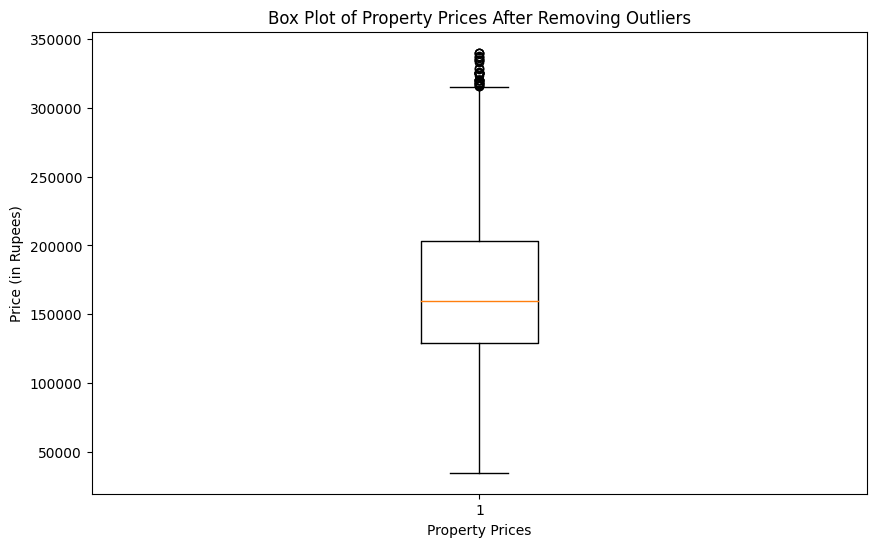

In [ ]:
# Box plot to visualize data after removing outliers
plt.figure(figsize=(10, 6))
plt.boxplot(housing['SalePrice'])
plt.xlabel('Property Prices')
plt.ylabel('Price (in Rupees)')
plt.title('Box Plot of Property Prices After Removing Outliers')
plt.show()

### Handeling Duplicate Data

In [ ]:
duplicate_rows = housing[housing.duplicated()]
# Print duplicate rows for inspection
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [LotArea, BedroomAbvGr, FullBath, HalfBath, SalePrice]
Index: []


In [ ]:
# Remove duplicates and overwrite the DataFrame
housing = housing.drop_duplicates()

### Scaling the Data and Splitting into Train-Test sets

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Create a Column Transformer
ct = make_column_transformer((StandardScaler(), ['LotArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']), remainder='passthrough')

# Separate features (X) and target variable (y)
X = housing.drop("SalePrice",axis=1)
y = housing["SalePrice"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

# Converting Transformed sets into Dataframes
X_train_normal_df = pd.DataFrame(X_train_normal, columns=X.columns)
X_test_normal_df = pd.DataFrame(X_test_normal, columns=X.columns)

# Print the first few rows of the scaled DataFrame
print(X_train_normal_df.head())

    LotArea  BedroomAbvGr  FullBath  HalfBath
0 -0.049964      0.190287 -0.999919 -0.758662
1  0.272127      0.190287  0.849754  1.247195
2 -0.783985     -1.062733  0.849754 -0.758662
3 -0.118841      0.190287  0.849754  1.247195
4 -0.228533      0.190287 -0.999919 -0.758662


##Building Model

In [ ]:
from sklearn.linear_model import LinearRegression

###Creating Model

In [ ]:
model = LinearRegression()
model.fit(X_train_normal_df,y_train)

LinearRegression()

###Predicting Results

In [ ]:
y_pred = model.predict(X_test_normal_df)
y_pred[0]

173563.09915034898

##Evaluating Model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 33561.82906094674
Mean Squared Error (MSE): 2009167589.9944112
R-squared (R2): 0.4335995732480322
